In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('res1.csv')
data

,territory,ec_number,participants_number,given_bulletins_number,returned_bulletins_number,invalid_bulletins_number,turnout,yes_votes_total,yes_votes_percentage,no_votes_total,no_votes_percentage
0,Александровская,370,156,98,98,0,62.820513,84,85.71,14,14.29
1,Александровская,371,288,175,175,0,60.763889,150,85.71,25,14.29
2,Александровская,372,245,130,130,0,53.061224,105,80.77,25,19.23
3,Александровская,373,887,339,339,8,38.218715,201,59.29,130,38.35
4,Александровская,374,1020,500,500,5,49.019608,283,56.60,212,42.40
...,...,...,...,...,...,...,...,...,...,...,...
697,Шегарская,768,959,340,340,1,35.453597,226,66.47,113,33.24
698,Шегарская,769,632,340,340,8,53.797468,230,67.65,102,30.00
699,Шегарская,770,737,354,354,5,48.032564,240,67.80,109,30.79
700,Шегарская,771,573,246,246,3,42.931937,167,67.89,76,30.89


In [3]:
data['yes_votes_percentage'] = data['yes_votes_percentage'].astype(float)
data['yes_votes_percentage'] = data['yes_votes_percentage'].div(100)
data['no_votes_percentage'] = data['no_votes_percentage'].astype(float)
data['no_votes_percentage'] = data['no_votes_percentage'].div(100)
data['turnout'] = data['turnout'].astype(float)
data['turnout'] = data['turnout'].div(100)
data[['yes_votes_percentage', 'turnout']]
# data.loc[:, 'yes_votes_percentage':'turnout']

,yes_votes_percentage,turnout
0,0.8571,0.628205
1,0.8571,0.607639
2,0.8077,0.530612
3,0.5929,0.382187
4,0.5660,0.490196
...,...,...
697,0.6647,0.354536
698,0.6765,0.537975
699,0.6780,0.480326
700,0.6789,0.429319


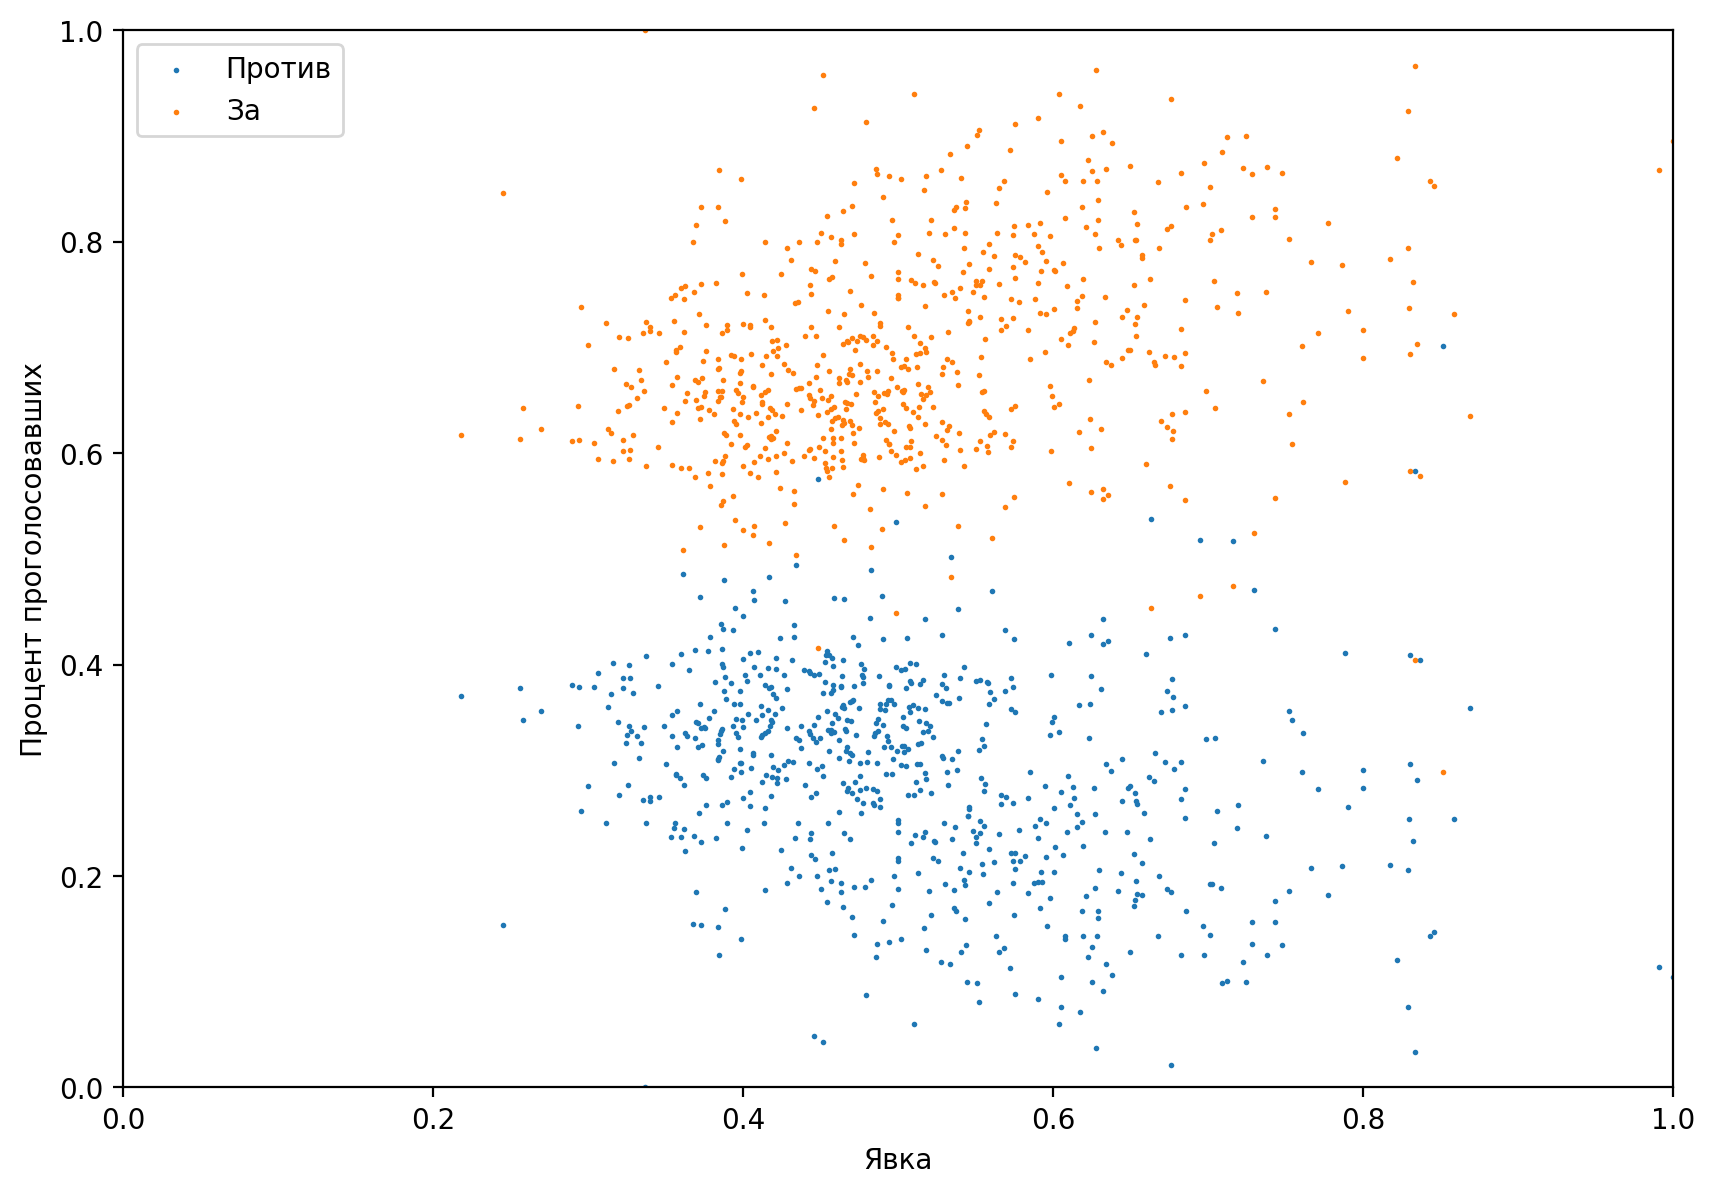

In [18]:
# new_data = data.loc[data['territory'] == 'Томск, Ленинская']
# new_data = data.loc[data['territory'] == 'Томск, Кировская']
# new_data = data.loc[data['territory'] == 'Томск, Советская']
new_data = data
figure(num=None, figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
plt.scatter(new_data['turnout'], new_data['no_votes_percentage'], s=1, label="Против")
plt.scatter(new_data['turnout'], new_data['yes_votes_percentage'], s=1, label="За")
plt.xlabel('Явка')
plt.ylabel('Процент проголосовавших')
plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [5]:
data.sort_values(by=['no_votes_percentage'], ascending=False)

,territory,ec_number,participants_number,given_bulletins_number,returned_bulletins_number,invalid_bulletins_number,turnout,yes_votes_total,yes_votes_percentage,no_votes_total,no_votes_percentage
478,"Томск, Кировская",94,256,218,218,0,0.851562,65,0.2982,153,0.7018
428,"Томск, Кировская",44,282,235,235,3,0.833333,95,0.4043,137,0.5830
646,Томская,717,2198,985,985,8,0.448135,410,0.4162,567,0.5756
135,Каргасокская,461,532,353,353,3,0.663534,160,0.4533,190,0.5382
303,Парабельская,573,375,187,187,3,0.498667,84,0.4492,100,0.5348
...,...,...,...,...,...,...,...,...,...,...,...
155,Каргасокская,481,104,47,47,0,0.451923,45,0.9574,2,0.0426
412,Тегульдетская,625,43,27,27,0,0.627907,26,0.9630,1,0.0370
411,Тегульдетская,624,36,30,30,0,0.833333,29,0.9667,1,0.0333
258,Кривошеинская,527,68,46,46,2,0.676471,43,0.9348,1,0.0217


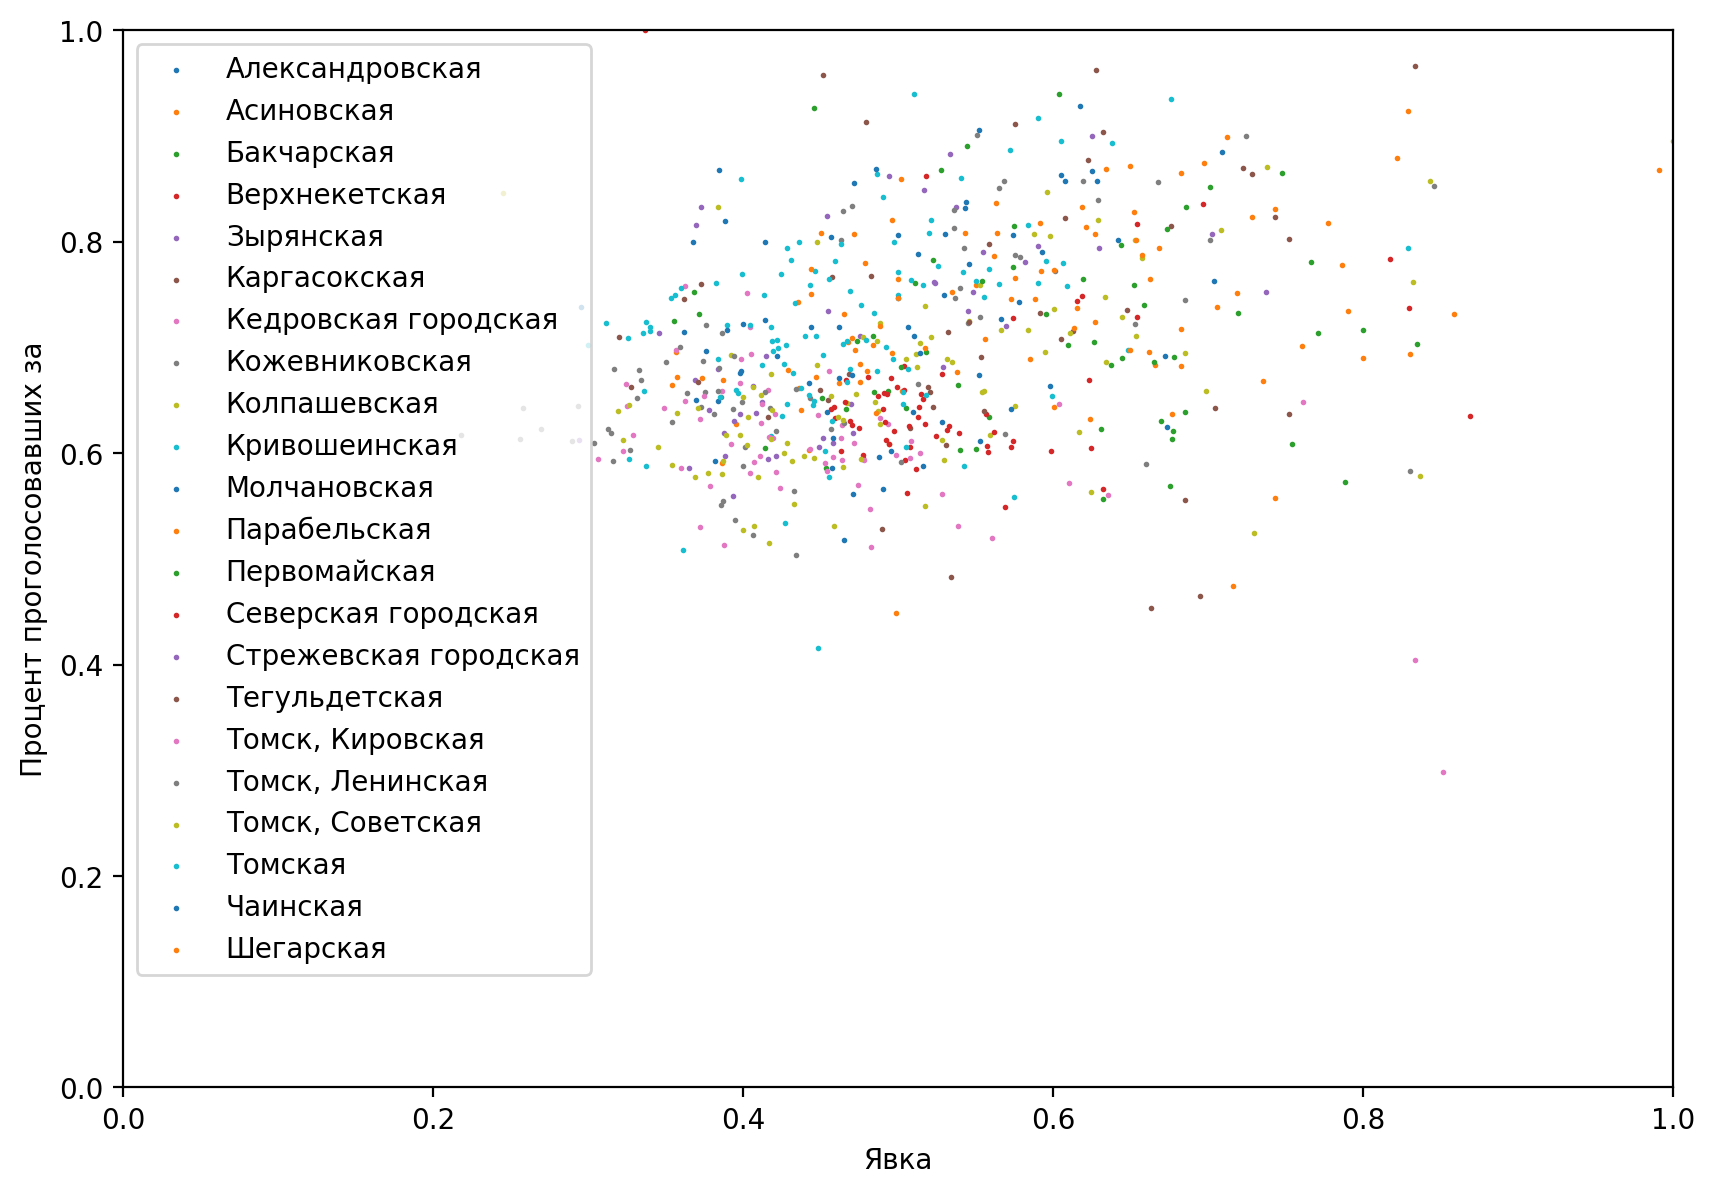

In [19]:
new_data = data
figure(num=None, figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
for i in data['territory'].unique():
    new_data = data.loc[data['territory'] == i]
    plt.scatter(new_data['turnout'], new_data['yes_votes_percentage'], s=1, label=i)
plt.xlabel('Явка')
plt.ylabel('Процент проголосовавших за')
plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [22]:
data.loc[data['no_votes_percentage'] < 0.2]

,territory,ec_number,participants_number,given_bulletins_number,returned_bulletins_number,invalid_bulletins_number,turnout,yes_votes_total,yes_votes_percentage,no_votes_total,no_votes_percentage
0,Александровская,370,156,98,98,0,0.628205,84,0.8571,14,0.1429
1,Александровская,371,288,175,175,0,0.607639,150,0.8571,25,0.1429
2,Александровская,372,245,130,130,0,0.530612,105,0.8077,25,0.1923
7,Александровская,377,68,37,37,1,0.544118,31,0.8378,5,0.1351
27,Асиновская,273,637,287,287,1,0.450549,232,0.8084,54,0.1882
...,...,...,...,...,...,...,...,...,...,...,...
683,Шегарская,754,525,343,343,1,0.653333,275,0.8017,67,0.1953
684,Шегарская,755,230,125,125,0,0.543478,101,0.8080,24,0.1920
686,Шегарская,757,893,664,664,8,0.743561,552,0.8313,104,0.1566
687,Шегарская,758,464,291,291,1,0.627155,235,0.8076,55,0.1890
